## TP 2 SI221 : K-nearest Neighbor

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
from itertools import permutations
from random import shuffle

## I. k-NN classiﬁcation: Synthetic dataset

### Question 1 :

In [2]:
def create_data(sig):
    data=[]
    cov=sig*np.identity(2)
    for i in range(300) :
        y= random.randint(0,3)
        if y==0:
            x=random.multivariate_normal([-1,0],cov)
        if y==1:
            x=random.multivariate_normal([1,0],cov)
        if y==2:
            x=random.multivariate_normal([0,1],cov)
        data=data+[[x,y]]
    training=np.array(data[0:200])
    test=np.array(data[201:300])
    return training,test

training,test=create_data(0.10)

In [3]:
def distance(A,B):
    dist=np.sum((B-A)**2)
    return np.sqrt(dist)

def pp_voisin(A,liste_points,K):
    
    liste_points_copy=np.copy(liste_points)
    n=len(liste_points_copy)
    distances=[]
    liste_voisins=[]
    
    for i in range(n):
        B=liste_points[i][0]
        distances.append(distance(A,B))
            
    for j in range(K):
        dist_min=min(distances)
        index_voisin=distances.index(dist_min)
        voisin=liste_points_copy[index_voisin]
        liste_voisins.append(voisin)
        distances.pop(index_voisin)
        liste_points_copy = np.delete(liste_points_copy,index_voisin, axis=0)
        
    return liste_voisins
        
def afficher(liste_points,voisins,A):
    plt.figure()
    for elmt in voisins:
        if elmt[1]==0:
            plt.plot(elmt[0][0],elmt[0][1],'o',color='y')
        elif elmt[1]==1:
            plt.plot(elmt[0][0],elmt[0][1],'o',color='b')
        else :
            plt.plot(elmt[0][0],elmt[0][1],'o',color='g')
    
    for elmt in liste_points:
        if elmt[1]==0:
            plt.plot(elmt[0][0],elmt[0][1],marker='+',color='y')
        elif elmt[1]==1:
            plt.plot(elmt[0][0],elmt[0][1],marker='+',color='b')
        else :
            plt.plot(elmt[0][0],elmt[0][1],marker='+',color='g')
    plt.plot(A[0],A[1],'s',color='r',label="Point étudié")
    plt.legend()
    plt.title("En jaune, les points de la classe 0, en bleu ceux de la classe 1 et en vert ceux de la classe 2")
    plt.show()



def KNN(A,liste_points,K,n_classes=3):
    liste_voisins=pp_voisin(A,liste_points,K)
    classe=[0 for i in range(n_classes)]
    for i in range(K):
        classe[liste_voisins[i][1]]+=1
    return (classe.index(max(classe)))

def maping(liste_points,K):
    nb_mesures=10
    Z=np.ones((10,10))*(-1)
    Y=np.zeros((10,10))
    minX=min(liste_points[:,0][0])-1
    minY=min(liste_points[:,0][1])-1
    maxX=max(liste_points[:,0][0])+1
    maxY=max(liste_points[:,0][1])+1
    color_list=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','pink']
    plt.figure()
    for elmt in liste_points:
        plt.plot(elmt[0][0],elmt[0][1],marker='+',color=color_list[elmt[1]])

        if elmt[0][0]<minX:
            minX=elmt[0][0]-1
        if elmt[0][1]<minY:
            minY=elmt[0][1]-1
        if elmt[0][0]>maxX:
            maxX=elmt[0][0]+1
        if elmt[0][1]>maxY:
            maxY=elmt[0][1]+1
            
    X=np.linspace(minX,maxX,nb_mesures)
    Y=np.linspace(minY,maxY,nb_mesures)
    xx1, xx2 = np.meshgrid(X,Y)
    z=[]
    inputs = np.c_[xx1.ravel(), xx2.ravel()]
    for i in range(len(inputs)):
        z.append(KNN(inputs[i], liste_points,K))
    result = np.array(z).reshape(xx1.shape)
    plt.contourf(xx1,xx2,result)
    plt.title("Map de classification en considérant "+str(K)+" voisins")
    plt.show()
            

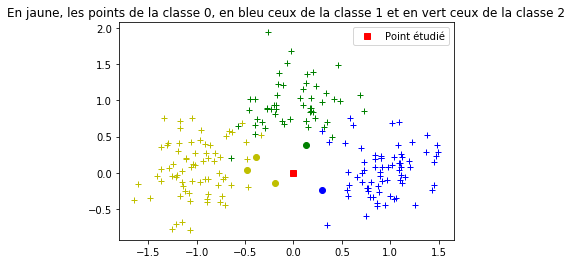

Le point est classé dans la classe n°0


In [4]:
liste_voisins=pp_voisin([0,0],training,5)
afficher(training,liste_voisins,[0,0])
print('Le point est classé dans la classe n°'+str(KNN([0,0],training,5)))

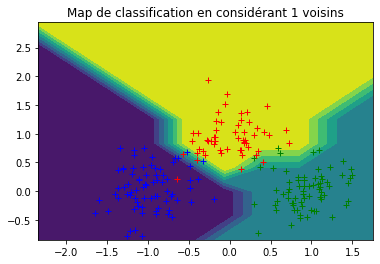

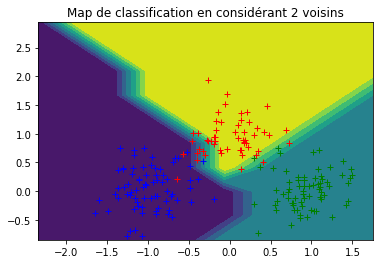

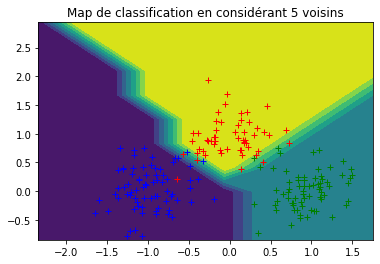

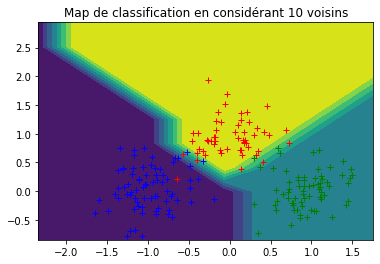

In [5]:
K=[1,2,5,10]
for k in K:
    maping(training,k)

---
__Reponse__ :
La décision de frontière semble plus linéaire quand le nombre de voisins considérés augmentent. En effet, comme on réalise une comparaison sur un plus grand nombre de points, le résultat est mon dépendant des points à proximité. 

---

### Question 2 

In [6]:
def errors(liste_points,K):
    err=0
    n=len(liste_points)
    for i in range(n):
        elmt=liste_points[i]
        liste= np.delete(liste_points,i, axis=0)
        classe_predict=KNN(elmt[0],liste,K)
        if classe_predict!=elmt[1]:
            err+=1
    return err/n
            
def std_deviation(mean, fractions):
    nbSamples = len(fractions)
    return ((1/nbSamples)*(sum((fractions - mean)**2)))**0.5

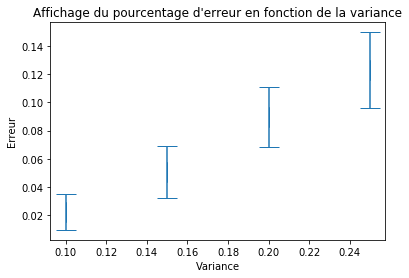

In [7]:
sigma=[0.10,0.15,0.20,0.25]
K=5
means=[]
deviations=[]
for j in range(len(sigma)):
    fractions = np.zeros(50)
    for i in range(50):
        training, test= create_data(sigma[j])
        fractions[i] = errors(training,K)
        
    means.append(fractions.mean())
    deviations.append(std_deviation(means[j], fractions))
plt.errorbar(sigma, means, xerr=[0, 0, 0, 0], yerr=deviations, fmt='none', capsize=10)
plt.title("Affichage du pourcentage d'erreur en fonction de la variance")
plt.xlabel('Variance')
plt.ylabel('Erreur')
plt.show()

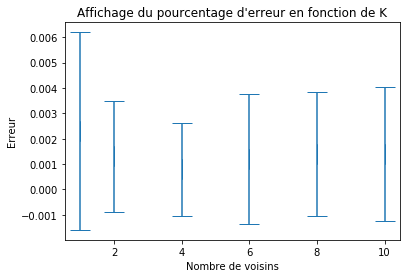

In [8]:
sigma=0.05
K=[1,2,4,6,8,10]
means=[]
deviations=[]
for j in range(len(K)):
    fractions = np.zeros(50)
    for i in range(50):
        training, test= create_data(sigma)
        fractions[i] = errors(training,K[j])
    means.append(fractions.mean())
    deviations.append(std_deviation(means[j], fractions))
plt.errorbar(K, means, xerr=[0, 0, 0,0,0,0], yerr=deviations, fmt='none', capsize=10)
plt.title("Affichage du pourcentage d'erreur en fonction de K")
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur')
plt.show()

---
__Réponse :__  Quand on augmente la variance, le nombre d'erreurs et la variance autour du nombre d'erreurs augmentent, en effet, les clusters ont une plus grande probabilité d'être mélangés. Quand on augmente K,le nombre d'erreur semble diminuer légèrement, théoriquement, on obtient une meilleur précision en étudiant plus de voisins.

---

## II. k-NN classiﬁcation: MNIST dataset

### Question 1 :

In [ ]:
import scipy.io 
train = scipy.io.loadmat(".\dataApp.mat") 
test = scipy.io.loadmat(".\dataTest.mat")

In [ ]:
X_test=test["x"]
X_test_scale=[]
for i in range(len(X_test)):
    X_test_scale.append((X_test[i].astype(float))/255.)
    
X_train=train["x"]
X_train_scale=[]
for i in range(len(X_train)):
    X_train_scale.append(X_train[i].astype(float) / 255.)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train_scale[i].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [ ]:
plt.figure(figsize=(10,3))

train_y=train['S']
train_y[train_y==10]=0
plt.subplot(121)
plt.hist(train_y)
plt.title("Histogramme du set de train")

test_y=test['S']
test_y[test_y==10]=0
plt.subplot(122)
plt.hist(test_y)
plt.title("Histogramme du set de test")

---
__Réponse :__ 
Les distributions semble uniformes et les mêmes dans les deux sets, bien que le set de test présente de grandes disparités, comme par exemple entre le nombre de données labelisées 0 et 1. 

---

### Question 2 :


In [ ]:
data_train=[]
for i in range(len(X_train)):
    data_train.append([X_train_scale[i],train_y[i][0]])
data_train=np.array(data_train)

data_test=[]
for i in range(len(X_test)):
    data_test.append([X_test_scale[i],test_y[i][0]])
data_test=np.array(data_test)

In [ ]:
def errors_test(train,test,K):
    err=0
    n=len(test)
    etape=0
    for elmt in test:
        classe_predict=KNN(elmt[0],train,K,10)
        if classe_predict!=elmt[1]:
            err+=1
    return err/n

In [ ]:
sigma=0.05
K=[1,2,3,4,5,6,7,8,9,10]
fractions=[]
for j in range(len(K)):
    fractions.append( errors_test(data_train,data_test,K[j]))

plt.plot(K, fractions,marker='o',linestyle='--')
plt.title("Pourcentage d'erreur en fonction de K")
plt.xlabel('Nombre de voisins')
plt.ylabel('Erreur')
plt.show()

### Question 3 :

In [ ]:
def confusion_matrix(train,test,K):
    mat=np.zeros((10,10))
    for elmt in test:
        classe_predict=KNN(elmt[0],train,K,10)
        mat[elmt[1],classe_predict]+=1
    return mat


In [ ]:
print("Pourcentage d'erreur pour K=1 : "+str(errors_test(data_train,data_test,1)))
print("Matrice de Confusion pour K=1 :")
confusion_matrix(data_train,data_test,1)

In [ ]:
print("Pourcentage d'erreur pour K=3 : "+str(errors_test(data_train,data_test,3)))
print("Matrice de Confusion pour K=3 :")
confusion_matrix(data_train,data_test,3)

In [ ]:
print("Pourcentage d'erreur pour K=5 : "+str(errors_test(data_train,data_test,5)))
print("Matrice de Confusion pour K=5 :")
confusion_matrix(data_train,data_test,5)